### Autokoder 

In [56]:
#1. sa uczeniem nienadzorwanym dobrze nadaja sie do rekukcji wymiarowaości 
#2. dobrze nadaja sie do rozpoznowania wzorców 
# na wejsciu dostaj dane i staraja się w nich rozpoznać wzorace(koder) na wyjsciu (dekoder) próbuje
# przedsawić wzorzec

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# autokoder przeprowadzajacy analize PCA
# 3d zbiór na 2d 
import keras 
from keras import Sequential
from keras import layers

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])]) #wejść musi być
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])]) #tyle samo co wyjść
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.01))

In [3]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X_train = X + [0.2, 0, 0.2]  # shift a bit

In [4]:
history = autoencoder.fit(X_train, X_train, epochs=500, verbose=False)
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 3ms/step


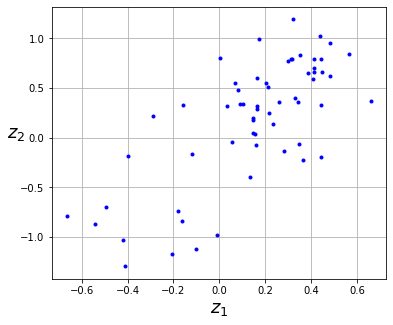

In [5]:
fig = plt.figure(figsize=(6,5))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

#### Autokoder w celu wyszukiwania etykiet do uczenia 

In [6]:
# extra code – loads, scales, and splits the fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [7]:
## Autokoder w MNIST
# 1 warsta (ilosć przykładów)
# 2 wasrtwa (100 neruonowó)
# 3 wasrtaw (ilość kalas)
# 4 warstwa (100 neuronów)
# 5 warstwa (ilość przykładów)

encoder_deep = Sequential()
encoder_deep.add(layers.Flatten(input_shape=[28,28]))
encoder_deep.add(layers.Dense(100, activation="selu"))
encoder_deep.add(layers.Dense(30, activation="selu"))

decoder_deep = Sequential()
decoder_deep.add(layers.Dense(100, activation="selu", input_shape=[30]))
decoder_deep.add(layers.Dense(28*28, activation="sigmoid"))
decoder_deep.add(layers.Reshape([28,28]))# przekształcanie zpłaszczonych danych spowrotem do 2D

autoencoder_deep = keras.models.Sequential([encoder_deep,decoder_deep])


In [8]:
autoencoder_deep.compile(loss="binary_crossentropy", 
                         optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [9]:
history_deep = autoencoder_deep.fit(X_train, X_train, epochs=10, 
                                    validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3379 - val_loss: 0.3124
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3058 - val_loss: 0.3031
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2995 - val_loss: 0.2996
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2959 - val_loss: 0.2962
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2936 - val_loss: 0.2940
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2917 - val_loss: 0.2932
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2901 - val_loss: 0.2975
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2890 - val_loss: 0.2911
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2882 - val_loss: 0.2901
Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.287

In [10]:
import numpy as np

def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

# plot_reconstructions(autoencoder_deep)

# plt.show()

In [11]:
# rekonstrukcja danych przy użyciu innego algorytmu 

from sklearn.manifold import TSNE

X_valid_compressed = encoder_deep.predict(X_valid)
tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

157/157 [==============================] - 0s 1ms/step


C:\Users\Grzegorz Mróz\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


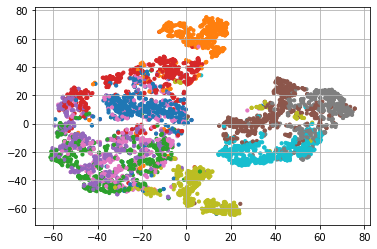

In [12]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap='tab10')
plt.grid()

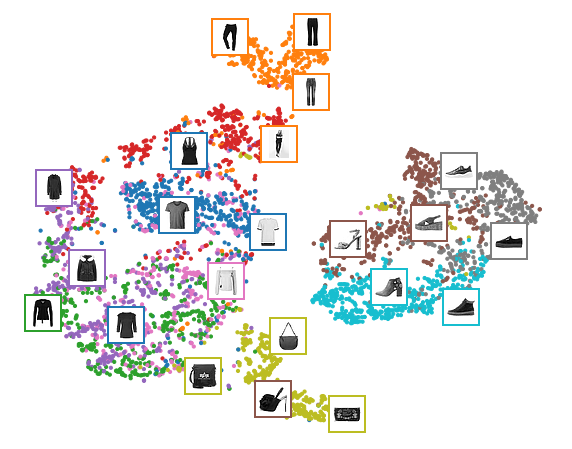

In [13]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.axis("off")

plt.show()

In [41]:
# wiązeanie wag kodera i dekodera - przyspiesza uczenie 
# trzeba stworzyć niestandartowa warstwe

In [14]:
class DenseTransponse(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.bias = self.add_weight(name="obciążenie", initializer="zeros",
        shape = [self.dense.input_shape[-1]])
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z+self.bias)
    

In [15]:
# tworzenie autokodera

dense_1 = keras.layers.Dense(100, activation="relu")
dense_2 = keras.layers.Dense(30, activation="relu")

tied_encoder = Sequential()
tied_encoder.add(layers.Flatten(input_shape=[28,28]))
tied_encoder.add(dense_1)
tied_encoder.add(dense_2)

tied_decoder = Sequential()
tied_decoder.add(DenseTransponse(dense_2, activation="relu"))
tied_decoder.add(DenseTransponse(dense_1, activation="relu"))
tied_decoder.add(layers.Reshape([28,28]))

In [16]:
all_autoencoder = Sequential([tied_encoder, tied_decoder])
all_autoencoder.compile(loss="mse", optimizer="nadam")


In [17]:
history = all_autoencoder.fit(X_train, X_train, epochs=10, 
                             validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0303 - val_loss: 0.0219
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0193 - val_loss: 0.0179
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0173 - val_loss: 0.0173
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0157 - val_loss: 0.0157
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0154 - val_loss: 0.0156
Epoch 8/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0152 - val_loss: 0.0154
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 10/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.015

### Autokodery konowlucyjne

In [18]:
## przy przetwarzaniu obrazów
cov_encoder = Sequential()
cov_encoder.add(layers.Reshape([28,28,1],input_shape=[28,28]))
cov_encoder.add(layers.Conv2D(16, kernel_size=3, activation="selu", padding="same"))
cov_encoder.add(layers.MaxPool2D(pool_size=2))
cov_encoder.add(layers.Conv2D(32, kernel_size=3, activation="selu", padding="same"))
cov_encoder.add(layers.MaxPool2D(pool_size=2))
cov_encoder.add(layers.Conv2D(64, kernel_size=3, activation="selu", padding="same"))
cov_encoder.add(layers.MaxPool2D(pool_size=2))


cov_decoder = Sequential()
cov_decoder.add(layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid",
                                      activation="selu", input_shape=[3,3,64]))
cov_decoder.add(layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same",
                                      activation="selu"))
cov_decoder.add(layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same",
                                      activation="sigmoid"))
cov_decoder.add(layers.Reshape([28,28]))

cov_ae = Sequential([cov_encoder, cov_decoder])

In [19]:
cov_ae.compile(loss="mse", optimizer="nadam", metrics=["acc"])


In [20]:
cov_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0179 - acc: 0.1990 - val_loss: 0.0106 - val_acc: 0.2433
Epoch 2/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.0094 - acc: 0.2767 - val_loss: 0.0084 - val_acc: 0.3041
Epoch 3/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.0078 - acc: 0.3258 - val_loss: 0.0077 - val_acc: 0.3442
Epoch 4/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.0068 - acc: 0.3589 - val_loss: 0.0064 - val_acc: 0.3601
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0061 - acc: 0.3791 - val_loss: 0.0058 - val_acc: 0.3835
Epoch 6/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.0056 - acc: 0.3920 - val_loss: 0.0055 - val_acc: 0.3863
Epoch 7/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.0053 - acc: 0.3989 - val_loss: 0.0051 - val_acc: 0.3958
Epoch 8/10
1719/1719 [==========================

1/1 [==============================] - 0s 122ms/step


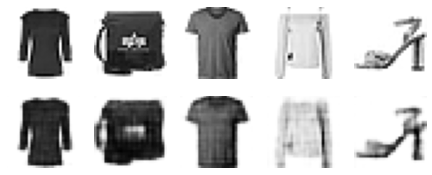

In [21]:
plot_reconstructions(cov_ae)
plt.show()

In [22]:
import matplotlib as mpl

### Autokoder rekurencyjne 

In [23]:
recur_encoder = Sequential()
recur_encoder.add(layers.LSTM(100, return_sequences=True, input_shape=[None,28]))
recur_encoder.add(layers.LSTM(30))

recur_decoder = Sequential()
recur_decoder.add(layers.RepeatVector(28, input_shape=[30]))
recur_decoder.add(layers.LSTM(100, return_sequences=True))
recur_decoder.add(layers.TimeDistributed(layers.Dense(28, activation="sigmoid")))


recur_ae = Sequential([recur_encoder, recur_decoder])

In [24]:
recur_ae.compile(loss="mse", optimizer="nadam", metrics=["acc"])

In [25]:
recur_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 71s 39ms/step - loss: 0.0345 - acc: 0.0737 - val_loss: 0.0228 - val_acc: 0.0885
Epoch 2/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.0203 - acc: 0.0968 - val_loss: 0.0179 - val_acc: 0.1092
Epoch 3/10
1719/1719 [==============================] - 63s 37ms/step - loss: 0.0168 - acc: 0.1142 - val_loss: 0.0157 - val_acc: 0.1235
Epoch 4/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.0147 - acc: 0.1323 - val_loss: 0.0137 - val_acc: 0.1380
Epoch 5/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.0133 - acc: 0.1490 - val_loss: 0.0126 - val_acc: 0.1546
Epoch 6/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.0123 - acc: 0.1632 - val_loss: 0.0118 - val_acc: 0.1713
Epoch 7/10
1719/1719 [==============================] - 63s 37ms/step - loss: 0.0116 - acc: 0.1741 - val_loss: 0.0112 - val_acc: 0.1802
Epoch 8/10
1719/1719 [==========================

1/1 [==============================] - 1s 956ms/step


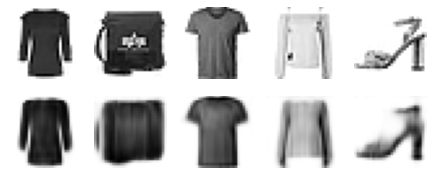

In [26]:
plot_reconstructions(recur_ae)
plt.show()

### Autokodery odszumiające 

In [27]:
# dodawanie szumu lub dropaoutu na wejsciu może dobrze wyuczyć autokoder 

In [28]:
drop_encoder =Sequential()
drop_encoder.add(layers.Flatten(input_shape=[28,28]))
drop_encoder.add(layers.Dropout(0.5))
drop_encoder.add(layers.Dense(100, activation="relu"))
drop_encoder.add(layers.Dense(30, activation="relu"))

derop_decoder = Sequential()
derop_decoder.add(layers.Dense(100, activation="relu", input_shape=[30]))
derop_decoder.add(layers.Dense(28*28, activation="sigmoid" ))
derop_decoder.add(layers.Reshape([28,28]))

drop_ae = Sequential([drop_encoder, derop_decoder])

In [29]:
drop_ae.compile(loss="mse", optimizer="nadam", metrics=["acc"])

In [30]:
drop_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0288 - acc: 0.0945 - val_loss: 0.0193 - val_acc: 0.1108
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0196 - acc: 0.1122 - val_loss: 0.0165 - val_acc: 0.1198
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0180 - acc: 0.1234 - val_loss: 0.0155 - val_acc: 0.1327
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0171 - acc: 0.1314 - val_loss: 0.0148 - val_acc: 0.1402
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0166 - acc: 0.1371 - val_loss: 0.0144 - val_acc: 0.1427
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0162 - acc: 0.1413 - val_loss: 0.0141 - val_acc: 0.1524
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0159 - acc: 0.1443 - val_loss: 0.0138 - val_acc: 0.1517
Epoch 8/10
1719/1719 [==============================] - 5s 3ms

1/1 [==============================] - 0s 68ms/step


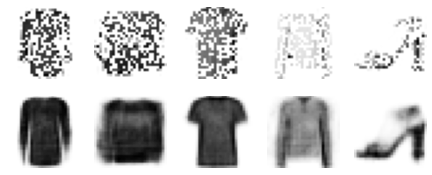

In [31]:
# autocoder zgaduje w którym miejscu ma uzupłenić dane jaka wartością
tf.random.set_seed(42)
dropout = tf.keras.layers.Dropout(0.5)
plot_reconstructions(drop_ae, dropout(X_valid, training=True))
plt.show()

### Autokodery rzadkie

In [ ]:
# za pomoca l1 i l2 można wyznaczyć ilość znaczących neuronów które nauczą sie jednej znaczącej cechy 

In [32]:
sparse_encoder = Sequential()
sparse_encoder.add(layers.Flatten(input_shape=[28,28]))
sparse_encoder.add(layers.Dense(100, activation="selu"))
sparse_encoder.add(layers.Dense(30, activation="sigmoid"))
sparse_encoder.add(layers.ActivityRegularization(l1=1e-3))#l1

sparse_decoder = Sequential()
sparse_decoder.add(layers.Dense(100, activation="selu", input_shape=[30]))
sparse_decoder.add(layers.Dense(28*28, activation="sigmoid"))
sparse_decoder.add(layers.Reshape([28,28]))

sparseae = Sequential([sparse_encoder, sparse_decoder])

In [33]:
sparseae.compile(loss="mse", optimizer="nadam", metrics=["acc"])

In [34]:
sparseae.fit(X_train, X_train, epochs=10,
            validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0351 - acc: 0.0875 - val_loss: 0.0256 - val_acc: 0.1001
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0229 - acc: 0.1048 - val_loss: 0.0216 - val_acc: 0.1082
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0204 - acc: 0.1125 - val_loss: 0.0196 - val_acc: 0.1168
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0188 - acc: 0.1189 - val_loss: 0.0183 - val_acc: 0.1255
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0177 - acc: 0.1237 - val_loss: 0.0174 - val_acc: 0.1258
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0169 - acc: 0.1272 - val_loss: 0.0167 - val_acc: 0.1344
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0163 - acc: 0.1307 - val_loss: 0.0161 - val_acc: 0.1363
Epoch 8/10
1719/1719 [==============================] - 5s 3ms

1/1 [==============================] - 0s 74ms/step


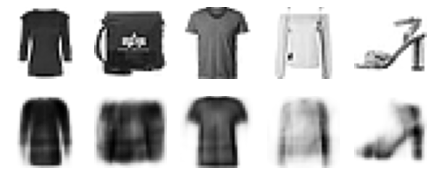

In [35]:
plot_reconstructions(sparseae)
plt.show()

In [36]:
## Autokoder z rzadkościa dywergencji Kullbacka-Lieberla (troche lepszy od l1 i l2)

In [37]:
K = keras.backend
kl_div = keras.losses.kullback_leibler_divergence

In [38]:
class KLDivergence (keras.regularizers.Regularizer):
    def __init__(self, weigth, target=0.1):
        self.wiegth = weigth
        self.target = target
    def call(self, inputs):
        neam_active = K.mean(inputs, axis=0)
        return self.weigth * (
            kl_div(self.target, neam_active)+
            kl_div(1. - self.target, 1. - neam_active))

In [39]:
kld_div = KLDivergence(weigth=0.5, target=0.1)
sparse_encoder_ = Sequential()
sparse_encoder_.add(layers.Flatten(input_shape=[28,28]))
sparse_encoder_.add(layers.Dense(100, activation="selu"))
sparse_encoder_.add(layers.Dense(300, activation="sigmoid", activity_regularizer=kld_div))

sparse_decoder_ = Sequential()
sparse_decoder_.add(layers.Dense(100, activation="selu", input_shape=[300]))
sparse_decoder_.add(layers.Dense(28*28, activation="sigmoid"))
sparse_decoder_.add(layers.Reshape([28,28]))

sparseae_ = Sequential([sparse_encoder_, sparse_decoder_])

In [40]:
sparseae_.compile(loss="mse", optimizer="nadam", metrics=["acc"])
sparseae_.fit(X_train, X_train, epochs=10,
            validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.0247 - acc: 0.0972 - val_loss: 0.0183 - val_acc: 0.1244
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0146 - acc: 0.1347 - val_loss: 0.0133 - val_acc: 0.1489
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0119 - acc: 0.1636 - val_loss: 0.0113 - val_acc: 0.1780
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0105 - acc: 0.1841 - val_loss: 0.0101 - val_acc: 0.1934
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0095 - acc: 0.1991 - val_loss: 0.0093 - val_acc: 0.2034
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0088 - acc: 0.2131 - val_loss: 0.0086 - val_acc: 0.2251
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0083 - acc: 0.2238 - val_loss: 0.0083 - val_acc: 0.2269
Epoch 8/10
1719/1719 [==============================] - 6s 3ms

1/1 [==============================] - 0s 20ms/step


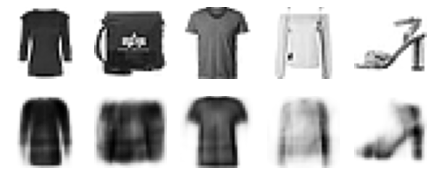

In [41]:
plot_reconstructions(sparseae)
plt.show()

### Autokodery warjacyjne 

In [31]:
# miedzy połaczeniem encdera i decodera jest wyliczane odchylenie std. i średnia o raozkładzie gaussa
# pózniej staosuje sie dywergencje  Kullbacka-Lieberla  KL

In [42]:
## warstaw niestandartowa służaca do próbkowania 
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean 

In [43]:
# tworzenie interfejsu funkcyjnego bo koder nie jest sekwencyjny 

In [44]:
# encoder
coodings_size = 10
inputs = keras.layers.Input(shape=[28,28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
coding_means = keras.layers.Dense(coodings_size)(z) #średnia 0 
coding_log_var = keras.layers.Dense(coodings_size)(z) #logartym wariancji 
codigns = Sampling()([coding_means, coding_log_var])
var_encoder = keras.Model(inputs=[inputs], outputs = [coding_means, coding_log_var, codigns])

# dekoder
decoder_inpusts = keras.layers.Input(shape=[coodings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inpusts)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28*28, activation="relu")(x)
outputs = keras.layers.Reshape([28,28])(x)
var_decoder = keras.Model(inputs=[decoder_inpusts], outputs=[outputs])

In [45]:
_, _, codings = var_encoder(inputs)
reconstruction = var_decoder(codigns)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstruction])

In [46]:
latent_loss = -0.5 * tf.reduce_sum(
    1 + coding_log_var - tf.exp(coding_log_var) - tf.square(coding_means),
    axis=-1)
variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)

In [47]:
variational_ae.compile(loss="mse", optimizer="nadam")
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 4s 5ms/step - loss: 0.0551 - val_loss: 0.0444
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0418 - val_loss: 0.0414
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0399 - val_loss: 0.0397
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0384 - val_loss: 0.0384
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0371 - val_loss: 0.0371
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0362 - val_loss: 0.0355
Epoch 7/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0355 - val_loss: 0.0366
Epoch 8/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0350 - val_loss: 0.0352
Epoch 9/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0346 - val_loss: 0.0345
Epoch 10/25
430/430 [==============================] - 2s 5ms/step - loss: 0.0342 - val_loss: 0.0346

1/1 [==============================] - 0s 97ms/step


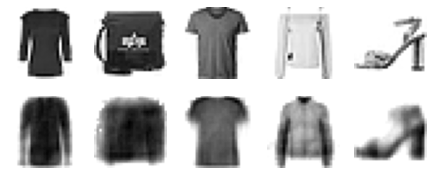

In [48]:
plot_reconstructions(variational_ae)
plt.show()

In [ ]:
### geberowanie gdanych
# probkowanie losowe kodowania i rozkładu gaussowskiego i zdekodowanie 

In [49]:
import numpy

In [50]:
codings = tf.random.normal(shape=[3 * 7, coodings_size])
images = var_decoder(codings).numpy()

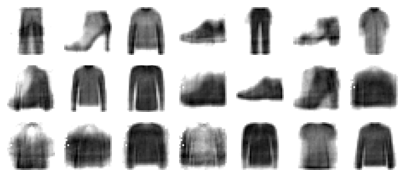

In [51]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

plot_multiple_images(images, 7)
plt.show()

In [ ]:
## generowanie danych za pomocą inetrlopacji - troche lepsze efekty 
# przepuszczanie obrazów przez koder, interpolowanaie kodowania, dekodowanie iterpolacji 

In [52]:
codings = np.zeros([7, coodings_size])
codings[:, 3] = np.linspace(-0.8, 0.8, 7)  # axis 3 looks best in this case
images = var_decoder(codings).numpy()

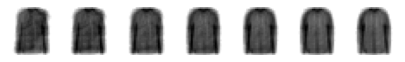

In [53]:
plot_multiple_images(images)
plt.show()

## GAN


In [54]:
# sieci przeciwstawe dobrze nadaja sie do generowaniania danych (zdj, tektu, serwgów czasowych)
# generator - generuje fikcyjne obrazy
# dyskryminator - stara się znależć rónice miedzy fałszywymi a prawdziwymi 
# najpierw trenuje sie dyskryminator na danych 1 - prawdziwe 0 - fałszywe 
# później z gerneratora generuje dane i przekazujemy do dyskrimantora 
# wagi dykr. za zamrozone po trenowaniu a strata przegazana do generatora który robi coraz lepsze dane

In [55]:
codings_size = 30
generator = Sequential()
generator.add(layers.Dense(300, activation="selu", input_shape=[codings_size]))
generator.add(layers.Dense(150, activation="selu"))
generator.add(layers.Dense(28*28, activation="sigmoid"))
generator.add(layers.Reshape([28,28]))

# dyskrimantor to klasyfikator binarny true false, daletgo ma wasrtwe Dene 1
dyskrymiantor = Sequential()
dyskrymiantor.add(layers.Flatten(input_shape=[28,28]))
dyskrymiantor.add(layers.Dense(150, activation="selu"))
dyskrymiantor.add(layers.Dense(300, activation="selu"))
dyskrymiantor.add(layers.Dense(1, activation="sigmoid"))

gan = Sequential([generator, dyskrymiantor])

In [56]:
# przy klasyfikacji binarnej entropia krzyżowa
dyskrymiantor.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])
dyskrymiantor.trainable = False # mrożenie wag

In [57]:
gan.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])

In [58]:
## pętla uczenia jest niestandartowa, wiec nie może być fit.
# twożenei data setu 

batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

Epoch 1/50


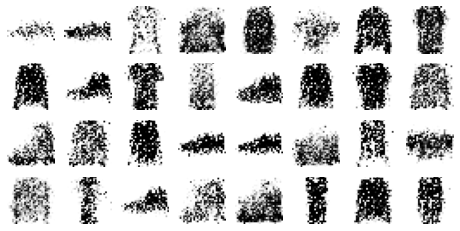

Epoch 2/50


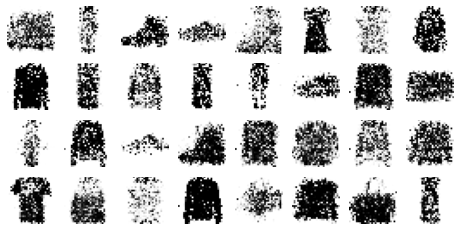

Epoch 3/50


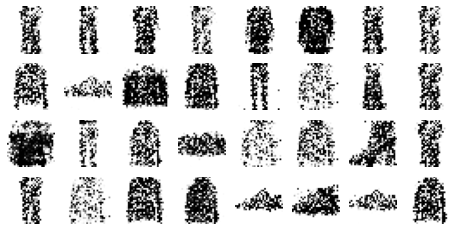

Epoch 4/50


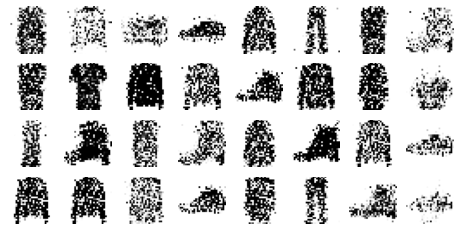

Epoch 5/50


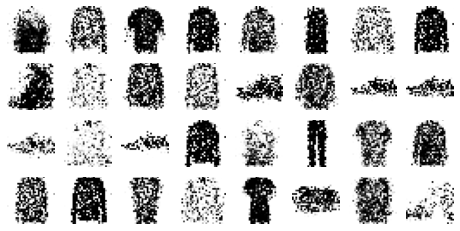

Epoch 6/50


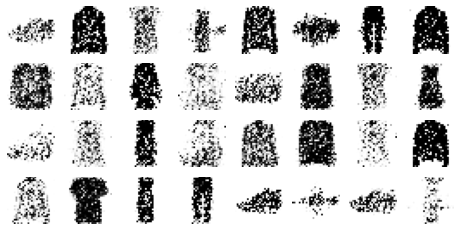

Epoch 7/50


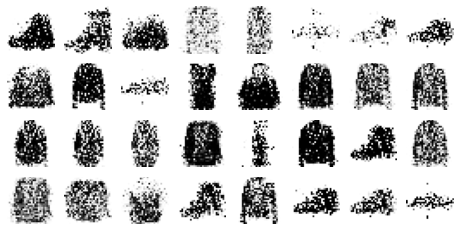

Epoch 8/50


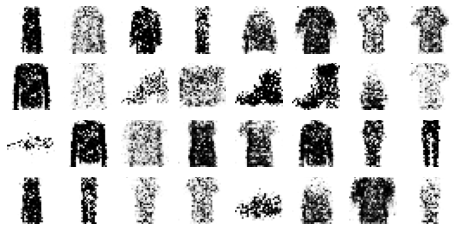

Epoch 9/50


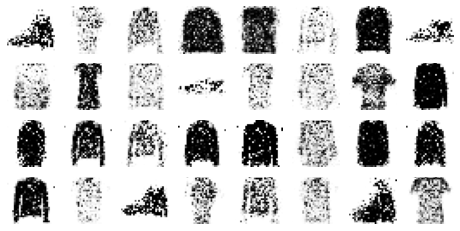

Epoch 10/50


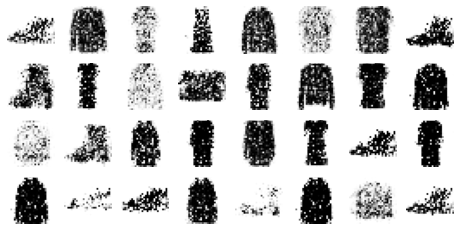

Epoch 11/50


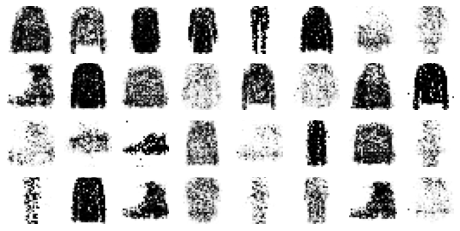

Epoch 12/50


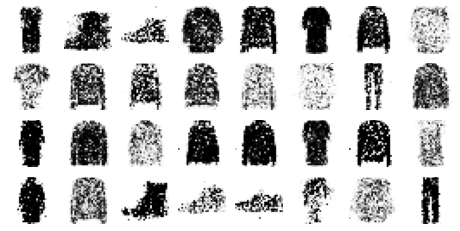

Epoch 13/50


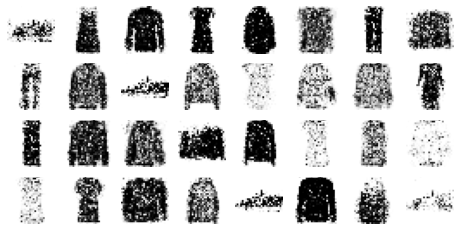

Epoch 14/50


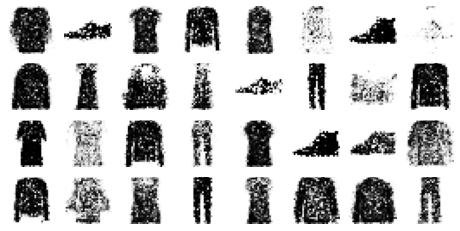

Epoch 15/50


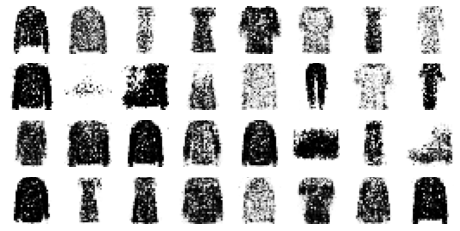

Epoch 16/50


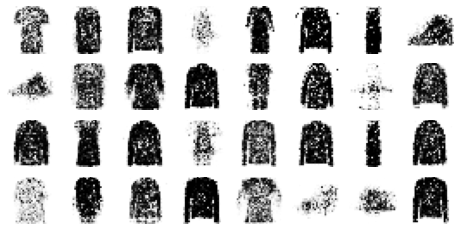

Epoch 17/50


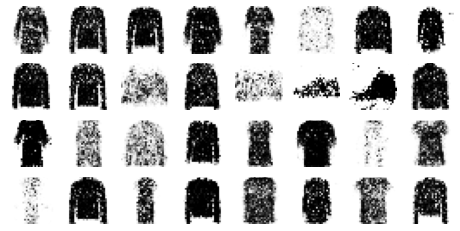

Epoch 18/50


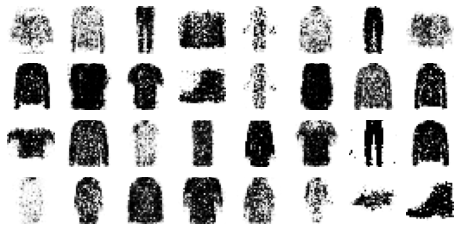

Epoch 19/50


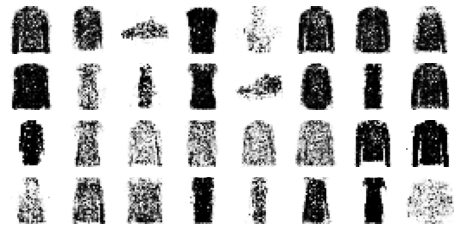

Epoch 20/50


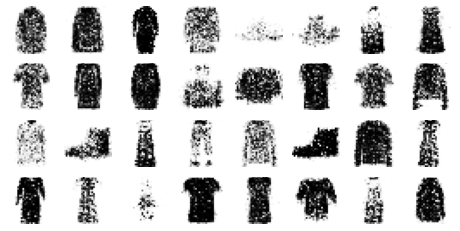

Epoch 21/50


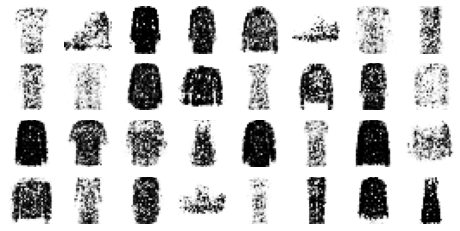

Epoch 22/50


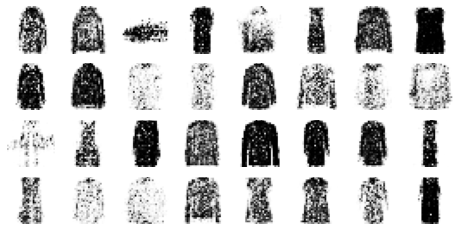

Epoch 23/50


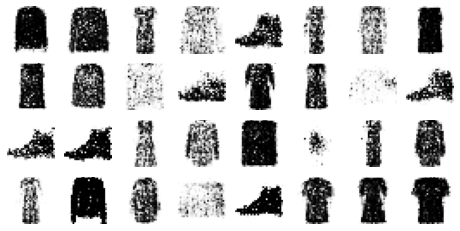

Epoch 24/50


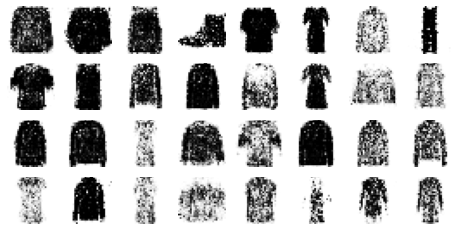

Epoch 25/50


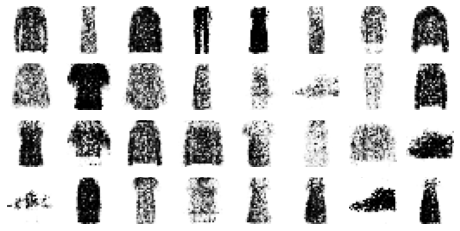

Epoch 26/50


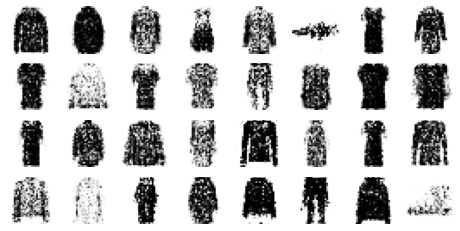

Epoch 27/50


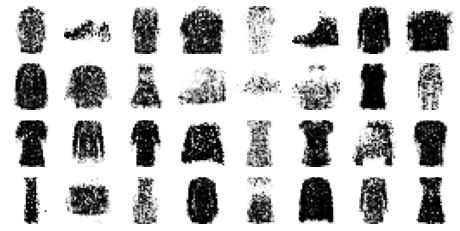

Epoch 28/50


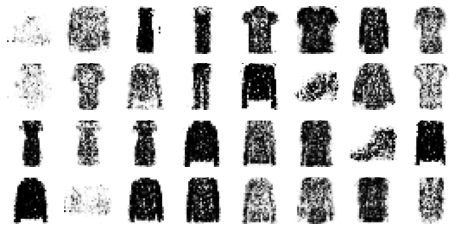

Epoch 29/50


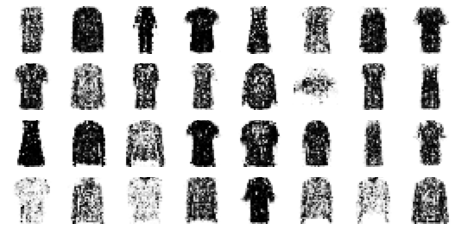

Epoch 30/50


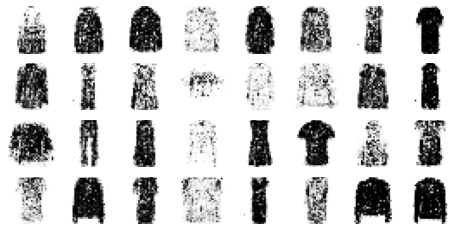

Epoch 31/50


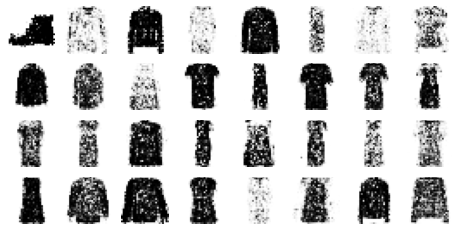

Epoch 32/50


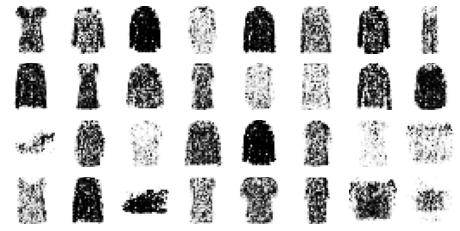

Epoch 33/50


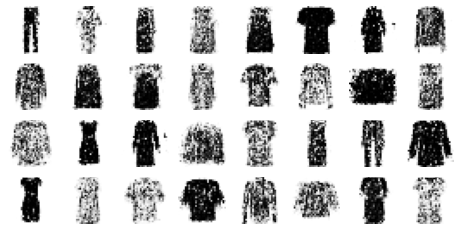

Epoch 34/50


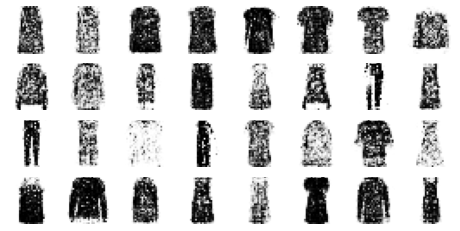

Epoch 35/50


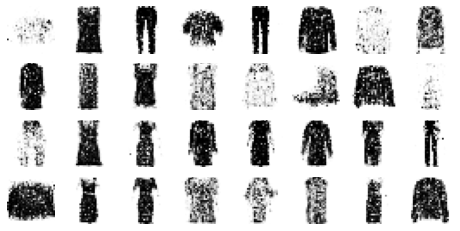

Epoch 36/50


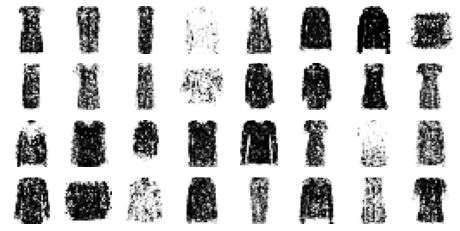

Epoch 37/50


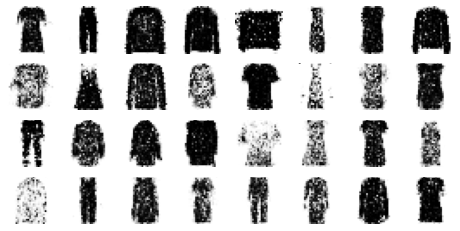

Epoch 38/50


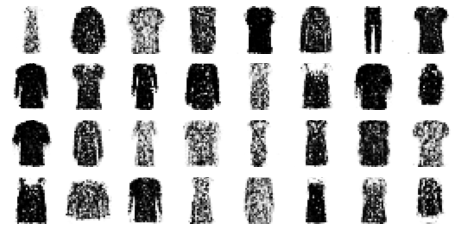

Epoch 39/50


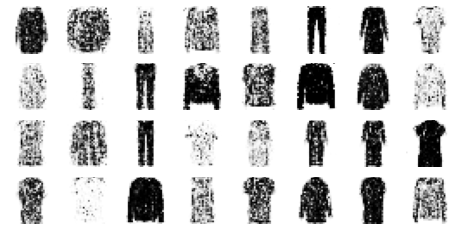

Epoch 40/50


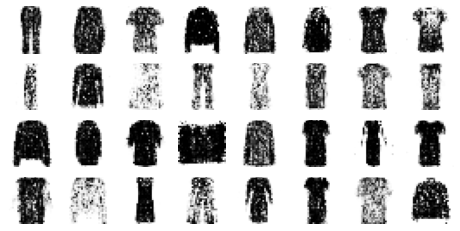

Epoch 41/50


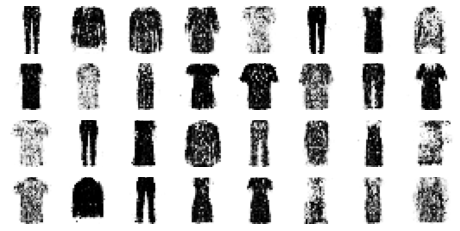

Epoch 42/50


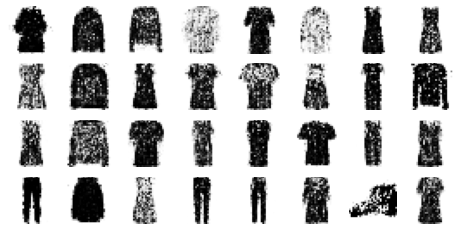

Epoch 43/50


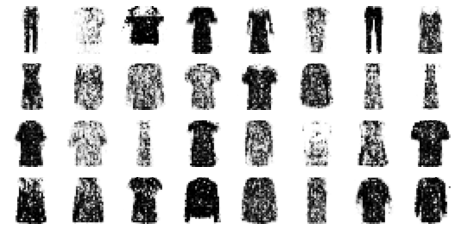

Epoch 44/50


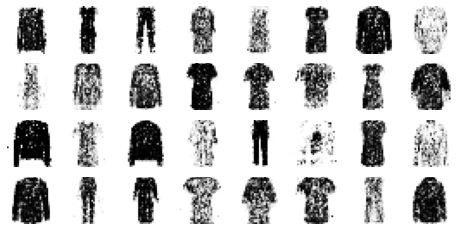

Epoch 45/50


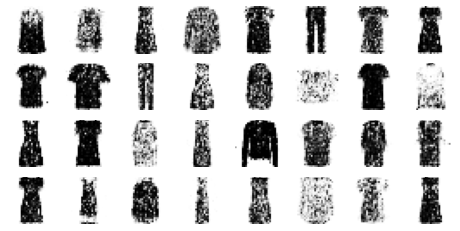

Epoch 46/50


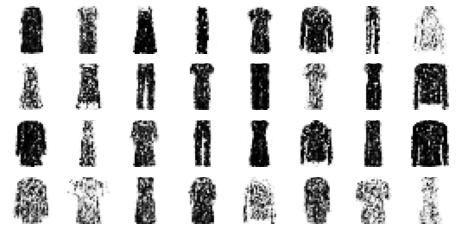

Epoch 47/50


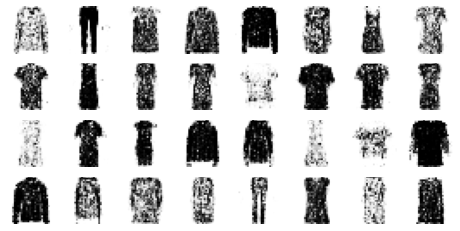

Epoch 48/50


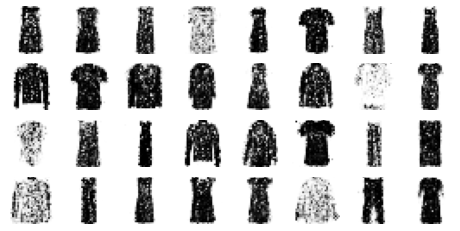

Epoch 49/50


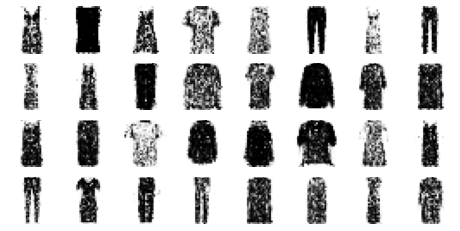

Epoch 50/50


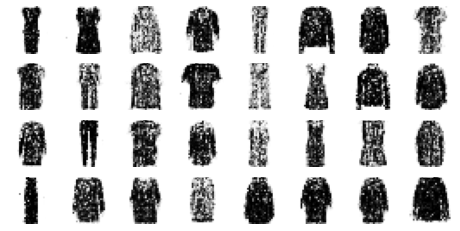

In [66]:
# petla uczenia jest niestatndartowa dlatego nie można użyć fit()

def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")  # extra code
        for X_batch in dataset:
            
            # faza 1 trenowanie discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            # labelki 0 - fałszywe obrazy 1- przwdziwe
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.train_on_batch(X_fake_and_real, y1)
            
            # faza 2  trenowanie generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            gan.train_on_batch(noise, y2)
        # extra code — plot images during training
        plot_multiple_images(generated_images.numpy(), 8)
        plt.show()

train_gan(gan, dataset, batch_size, codings_size, n_epochs=50)

#### Głebokie splotowe sieci GAN

In [74]:
codings_size = 100

generator_ = Sequential()
generator_.add(layers.Dense(7*7*128))
generator_.add(layers.Reshape([7,7,128]))
generator_.add(layers.BatchNormalization())
generator_.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                     activation="selu"))
generator_.add(layers.BatchNormalization())
generator_.add(layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                     activation="tanh"))

dyskrymiantor_ = Sequential()
dyskrymiantor_.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                         activation=layers.LeakyReLU(0.2),
                                         input_shape=([28,28,1])))
                  
dyskrymiantor_.add(layers.Dropout(0.5))
dyskrymiantor_.add(layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                                activation=layers.LeakyReLU(0.2)))
dyskrymiantor_.add(layers.Dropout(0.5))
dyskrymiantor_.add(layers.Flatten())
dyskrymiantor_.add(layers.Dense(1, activation="sigmoid"))


gan = Sequential([generator_, dyskrymiantor_])

In [75]:
## trzeba przeskalowac dane żeby mieściły sie w input_sahpe
x_train = X_train.reshape(-1,28,28,1) * 2. -1. #zmiana wymiarów

In [76]:
dyskrymiantor_.compile(loss="binary_crossentropy", optimizer="rmsprop")
dyskrymiantor_.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

Epoch 1/50


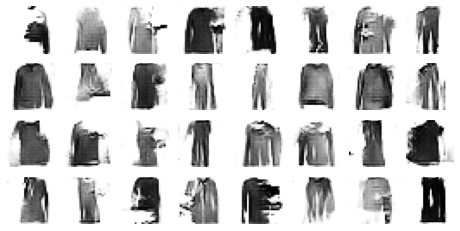

Epoch 2/50


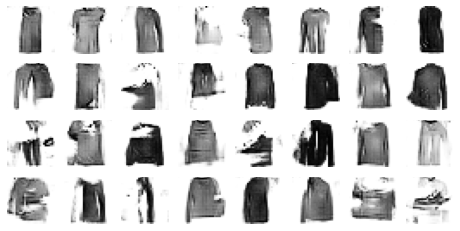

Epoch 3/50


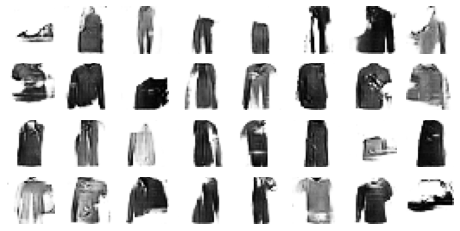

Epoch 4/50


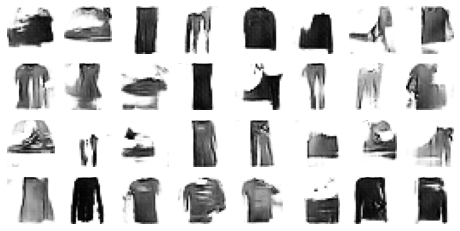

Epoch 5/50


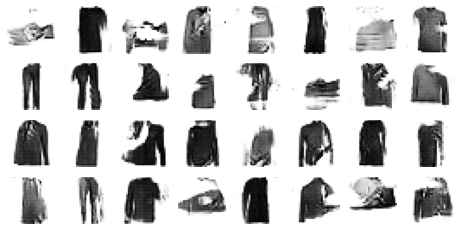

Epoch 6/50


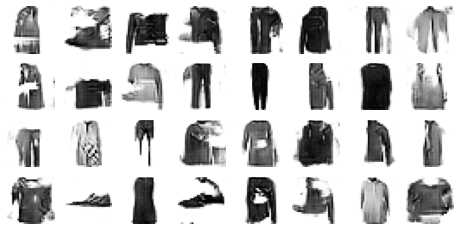

Epoch 7/50


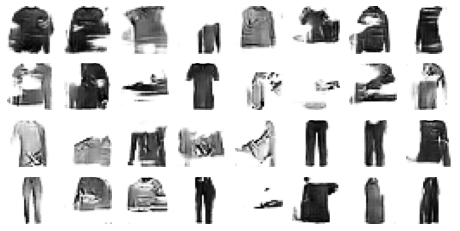

Epoch 8/50


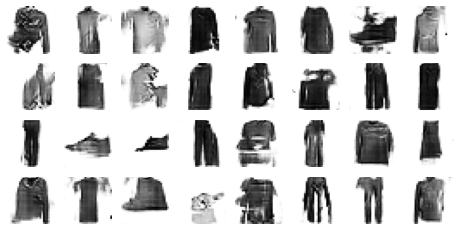

Epoch 9/50


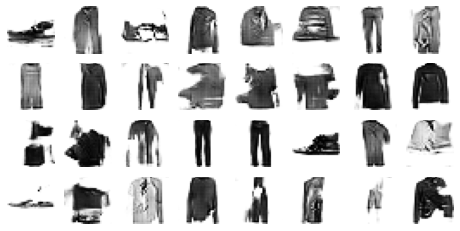

Epoch 10/50


In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
train_gan(gan, dataset, batch_size, codings_size, n_epochs=50)